In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
import geoplot as gplt
from shapely.geometry import Point, Polygon
import geoplot.crs as gcrs
import contextily as cx
from geopandas.tools import overlay
import mapclassify as mc
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

In [12]:
stations_raw = pd.read_csv('./data_roger/colorado_ev_stations_dataset.csv')
colorado_county = gpd.read_file('./data_roger/Colorado_County_Boundaries.geojson')
colorado_county.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [13]:
station_coords = stations_raw[['Station Name','Latitude','Longitude']]
station_coords = station_coords[station_coords['Longitude']< -75]
station_coords['coords'] = list(zip(station_coords['Longitude'],station_coords['Latitude']))
station_coords['coords'] = station_coords['coords'].apply(Point)
points = gpd.GeoDataFrame(station_coords, geometry='coords', crs=4326)

In [14]:
stations_with_county = gpd.tools.sjoin(points, colorado_county, how='left')
stations_with_county

,Station Name,Latitude,Longitude,coords,index_right,OBJECTID,COUNTY,FULL,LABEL,CNTY_FIPS,NUM_FIPS,CENT_LAT,CENT_LONG,US_FIPS
0,Denver International Airport - Canopy Airport ...,39.843886,-104.771138,POINT (-104.77114 39.84389),14,15,ADAMS,Adams County,Adams,001,1,39.873634,-104.337935,08001
1,Town of Superior - Town Hall,39.953798,-105.166116,POINT (-105.16612 39.95380),46,47,BOULDER,Boulder County,Boulder,013,13,40.092474,-105.357742,08013
2,New Belgium Brewing,40.593417,-105.068400,POINT (-105.06840 40.59342),0,1,LARIMER,Larimer County,Larimer,069,69,40.666413,-105.461155,08069
3,Tynan's Nissan,40.505604,-105.078041,POINT (-105.07804 40.50560),0,1,LARIMER,Larimer County,Larimer,069,69,40.666413,-105.461155,08069
4,Tremont Street Garage,39.742113,-104.991416,POINT (-104.99142 39.74211),59,60,DENVER,Denver County,Denver,031,31,39.762028,-104.876365,08031
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1737,EVERLEIGH EVERLEIGH,39.759807,-104.897199,POINT (-104.89720 39.75981),59,60,DENVER,Denver County,Denver,031,31,39.762028,-104.876365,08031
1738,The Exchange at Boulevard One,39.717630,-104.905532,POINT (-104.90553 39.71763),59,60,DENVER,Denver County,Denver,031,31,39.762028,-104.876365,08031
1739,The Exchange at Boulevard One - Lower Level Ga...,39.717630,-104.905532,POINT (-104.90553 39.71763),59,60,DENVER,Denver County,Denver,031,31,39.762028,-104.876365,08031
1740,CPW_6060 SWEITZER,38.713130,-108.041400,POINT (-108.04140 38.71313),18,19,DELTA,Delta County,Delta,029,29,38.861374,-107.862877,08029


In [15]:
station_county_count = stations_with_county.groupby('COUNTY').count()
station_county_count = station_county_count[['Station Name']]
station_county_count.rename(columns={'Station Name':'ev_station_count'}, inplace=True)
station_county_count

,ev_station_count
COUNTY,
ADAMS,90
ALAMOSA,5
ARAPAHOE,115
ARCHULETA,3
BENT,2
BOULDER,268
BROOMFIELD,24
CHAFFEE,22
CLEAR CREEK,9


In [16]:
counties_with_station_count = colorado_county.merge(station_county_count, on='COUNTY', how='left')
counties_with_station_count

,OBJECTID,COUNTY,FULL,LABEL,CNTY_FIPS,NUM_FIPS,CENT_LAT,CENT_LONG,US_FIPS,geometry,ev_station_count
0,1,LARIMER,Larimer County,Larimer,069,69,40.666413,-105.461155,08069,"POLYGON ((-105.05673 40.34929, -105.05664 40.3...",126.0
1,2,LAS ANIMAS,Las Animas County,Las Animas,071,71,37.315851,-104.038716,08071,"POLYGON ((-104.14319 37.75834, -104.14408 37.7...",3.0
2,3,FREMONT,Fremont County,Fremont,043,43,38.472972,-105.439657,08043,"POLYGON ((-105.36890 38.25941, -105.36889 38.2...",4.0
3,4,GUNNISON,Gunnison County,Gunnison,051,51,38.666798,-107.031700,08051,"POLYGON ((-106.79970 38.97966, -106.80041 38.9...",21.0
4,5,CONEJOS,Conejos County,Conejos,021,21,37.200696,-106.191629,08021,"POLYGON ((-106.14888 37.40111, -106.15066 37.4...",NaN
...,...,...,...,...,...,...,...,...,...,...,...
59,60,DENVER,Denver County,Denver,031,31,39.762028,-104.876365,08031,"MULTIPOLYGON (((-104.93414 39.70015, -104.9341...",274.0
60,61,PARK,Park County,Park,093,93,39.119303,-105.717175,08093,"POLYGON ((-105.97509 38.91010, -105.97501 38.9...",1.0
61,62,EL PASO,El Paso County,El Paso,041,41,38.832093,-104.525583,08041,"POLYGON ((-104.86403 39.12980, -104.86450 39.1...",70.0
62,63,ARAPAHOE,Arapahoe County,Arapahoe,005,5,39.649772,-104.339219,08005,"MULTIPOLYGON (((-104.89916 39.62414, -104.8989...",115.0


In [17]:
counties_with_station_count['ev_station_count'].fillna(0, inplace=True)

Text(0.5, 1.0, 'EV Station Count per County')

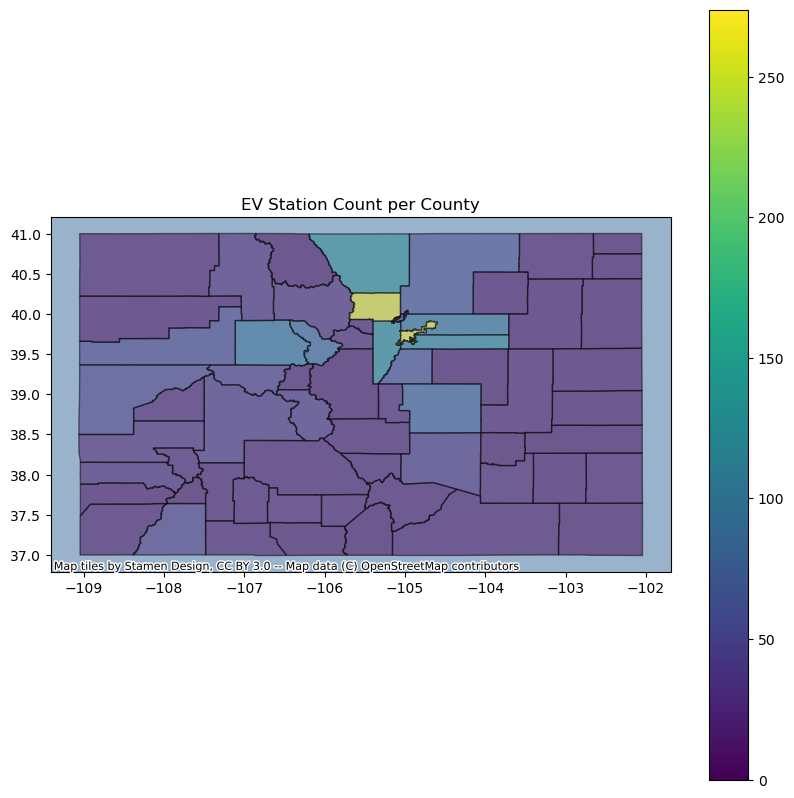

In [18]:
ax=counties_with_station_count.plot('ev_station_count',figsize=(10, 10), alpha=0.5, edgecolor='k', legend=True)
cx.add_basemap(ax)
plt.title('EV Station Count per County')